##### CSCI 303
# Introduction to Data Science
<p/>
### 19-Clustering

![K-Means iterations](kmeans.png) 

## This Lecture
---
- Clustering

## Setup
---
The obligatory setup code.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from pandas import DataFrame

plt.style.use("ggplot")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# function for generating normally distributed data|
def sample_cluster(n, x, y, sigma):
    x = np.random.randn(n) * sigma + x;
    y = np.random.randn(n) * sigma + y;
    return np.array([x, y]).T


## Synthetic Clustering Example
---

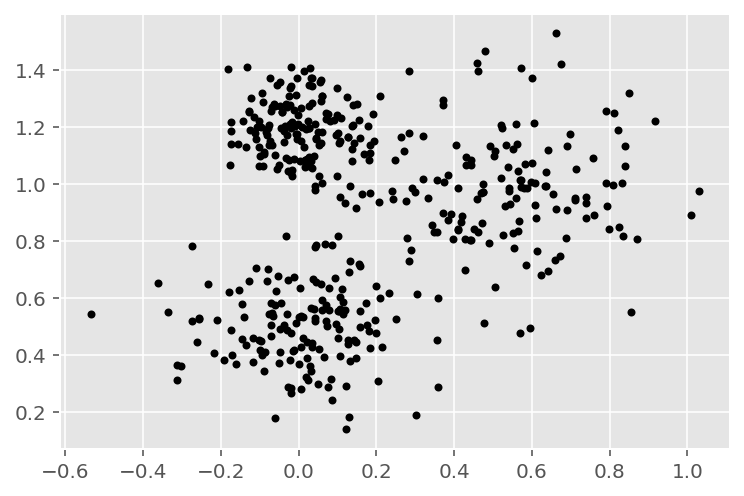

In [3]:
np.random.seed(1234)
n = 150

# create three 'sets' of 150 random data
c1 = sample_cluster(n, 0, 0.5, 0.15)
c2 = sample_cluster(n, 0, 1.2, 0.1)
c3 = sample_cluster(n, 0.5, 1, 0.2)

# put all of that data into one and plot it
data = np.concatenate((c1, c2, c3))
plt.plot(data[:,0], data[:,1], 'k.')
plt.show()

## Clustering
---
Simple idea:

- Choose $K$ (decide how many clusters you *think* there ought to be)
- Partition the data into $K$ disjoint clusters such that $\sum_{k=1}^K W(C_k)$ is minimized.
  - W(C) is some measure of within-cluster variation
  - Common choice for W is the sum of Euclidean distances between pairs of points:
  
  $$ W(C_k) = \frac{1}{|C_k|} \sum_{pairs(x,y): x, y \in C_k, x \ne y} \|x - y\|^2 $$

## Solution Approaches
---
- Brute force: try every possible partitions of the data
  - Advantage: globally optimal
  - Disadvantage: $\approx K^n$ different partitions (given $n$ data points)
- K-Means algorithm: iterative improvement
  - Advantage: efficient
  - Disadvantage: locally optimal, result depends on initialization

## K-Means Algorithm
---
- Various initialization schemes
  - One way is to assign each point a cluster identity at random
  - Another is to choose K points to serve as initial cluster centers at random
- Iterate until cluster assignments stop changing:
  - Compute the cluster *centroids*.  The centroid is the mean point (vector of means of all features) for all points in the cluster
  - Re-assign each data point to the cluster associated with the nearest centroid

This algorithm is ridiculously easy to code up.

In [5]:
# a simple k-means implementation
# input: integer K, ndarray data
def KMeans(K, data):
    n = data.shape[0]
    # intialize data into random clusters
    c = np.random.randint(low=0, high=K, size=n)
    C = [c]
    changed = True
    centroid = lambda k: np.mean(np.array([d for c,d in zip(c,data) if c == k]), axis=0)
    while changed:
        centroids = np.array([centroid(k) for k in range(K)])
        dists = [[np.linalg.norm(d - centroids[k]) for k in range(K)] for d in data]
        newc = np.argmin(np.array(dists), axis=1)
        changed = np.any(c != newc)
        C.append(newc)
        c = newc
    return C      

Let's give it a spin:

In [6]:
C = KMeans(3, data)
print("Iterations:", len(C))

Iterations: 7


Let's look at the first few iterations:


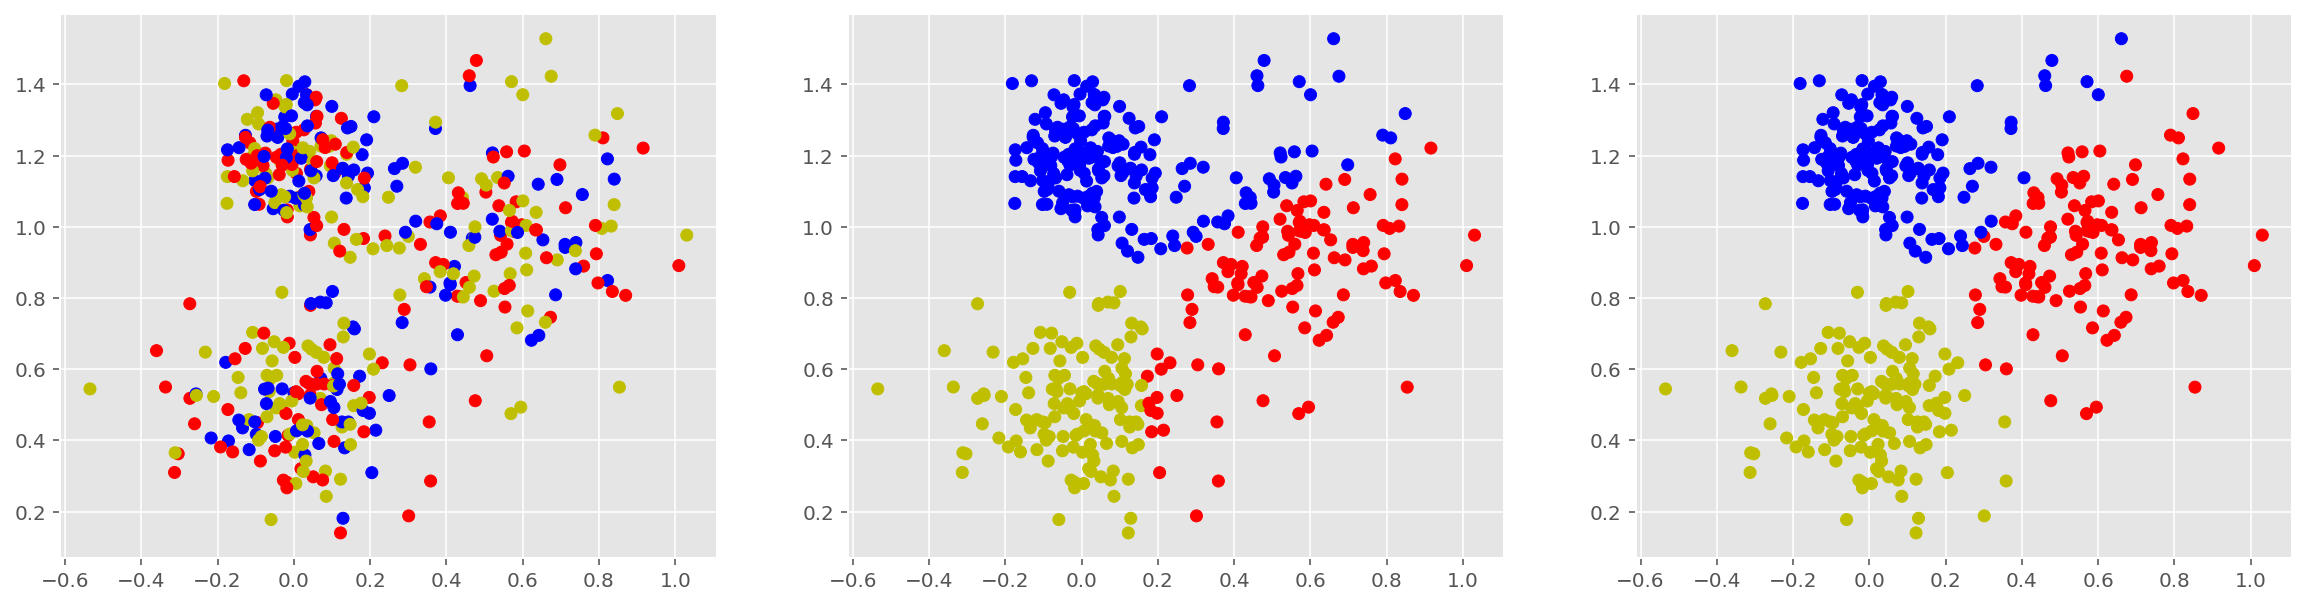

In [7]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'y', 'b'])
plt.figure(figsize=[20,5])
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(data[:,0], data[:,1], c=C[i], cmap=cmap)

Look at the final four:


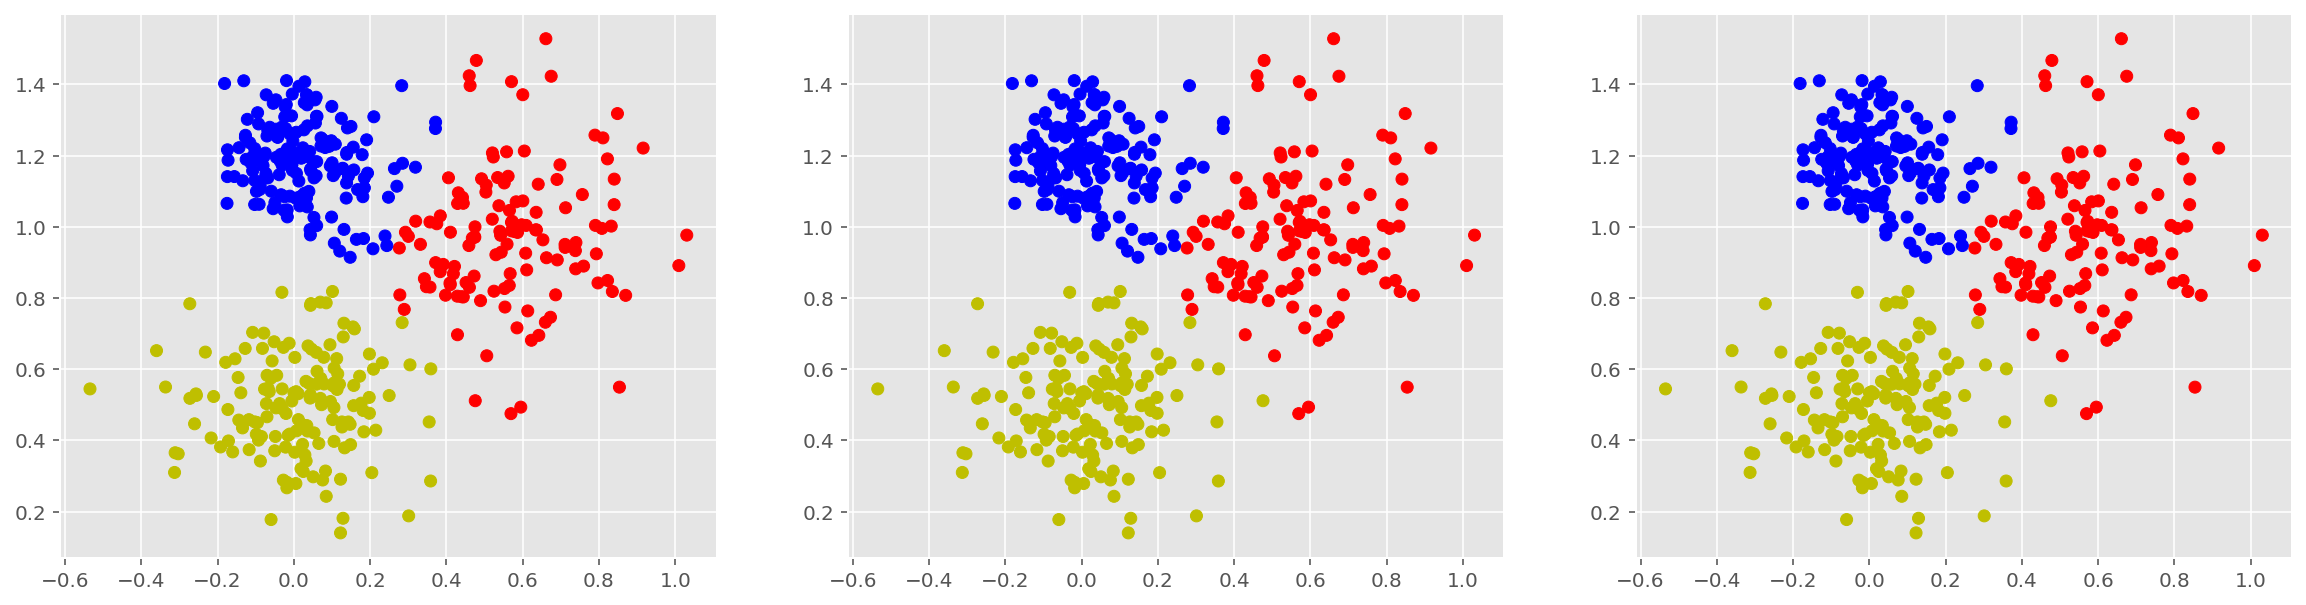

In [8]:
plt.figure(figsize=[20,5])
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(data[:,0], data[:,1], c=C[-(3-i)], cmap=cmap)

Here's an implementation that picks K points at random and clusters on those points initially:

In [4]:
# a simple k-means implementation
# input: integer K, ndarray data
def KMeans2(K, data):
    n = data.shape[0]
    # intialize data using normally distributed random centers
    centroids = data[np.random.randint(low=0, high=n, size=3)]
    dists = [[np.linalg.norm(d - centroids[k]) for k in range(K)] for d in data] 
    c = np.argmin(np.array(dists), axis=1)
    C = [c]
    changed = True
    centroid = lambda k: np.mean(np.array([d for c,d in zip(c,data) if c == k]), axis=0)
    while changed:
        centroids = np.array([centroid(k) for k in range(K)])
        dists = [[np.linalg.norm(d - centroids[k]) for k in range(K)] for d in data] # random normally distributed data
        newc = np.argmin(np.array(dists), axis=1)
        changed = np.any(c != newc)
        C.append(newc)
        c = newc
    return C      

In [5]:
C = KMeans2(3, data)
print("Iterations:", len(C))

Iterations: 5


First few interations:


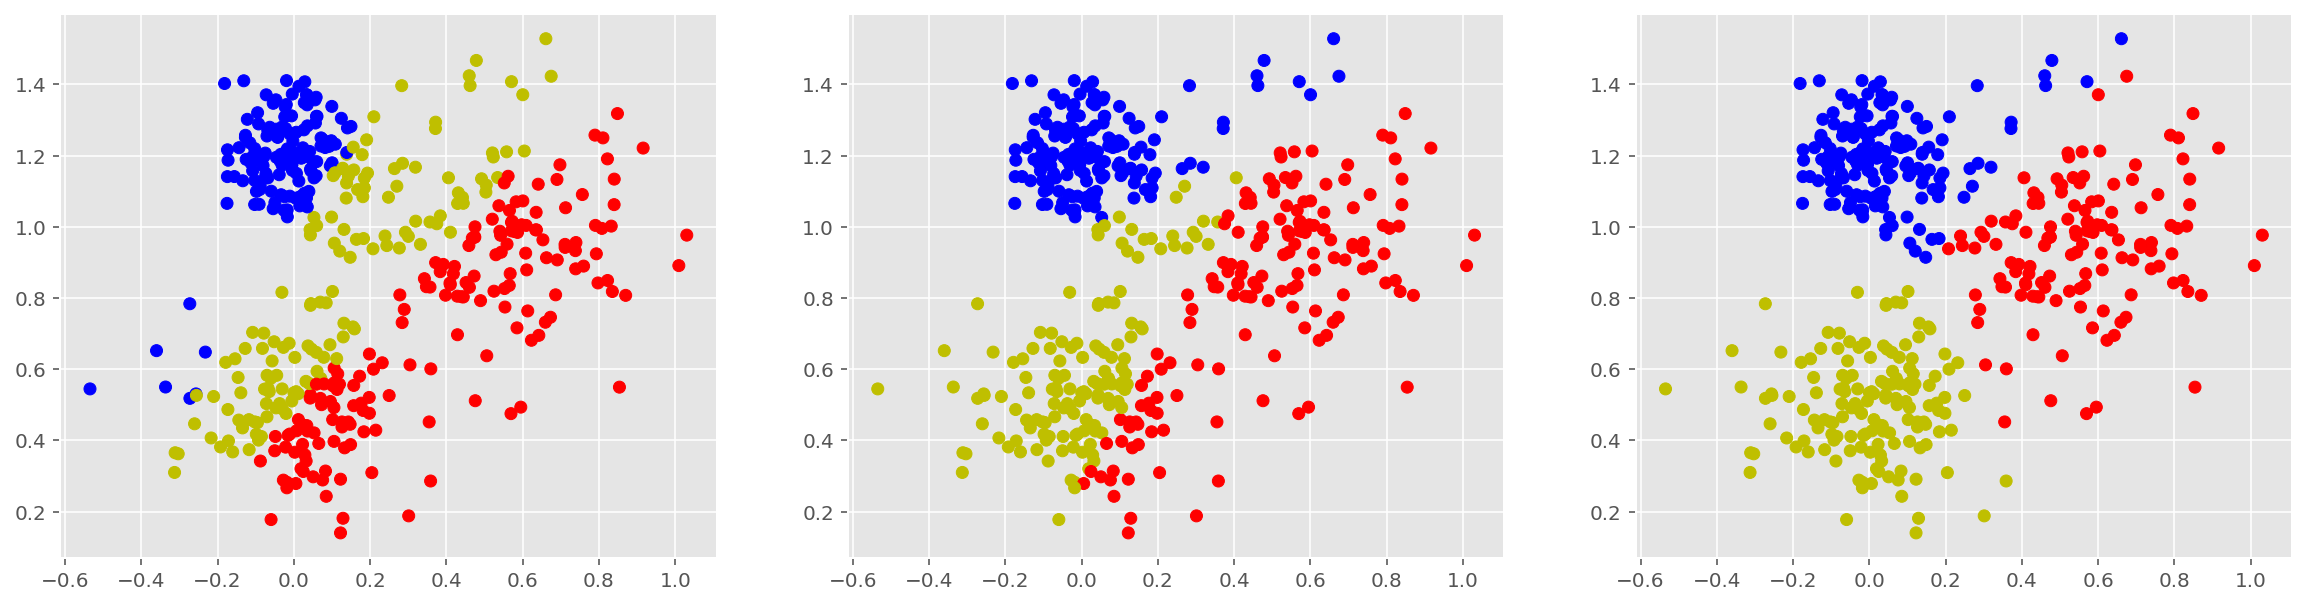

In [11]:
plt.figure(figsize=[20,5])
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(data[:,0], data[:,1], c=C[i], cmap=cmap)

Final four:

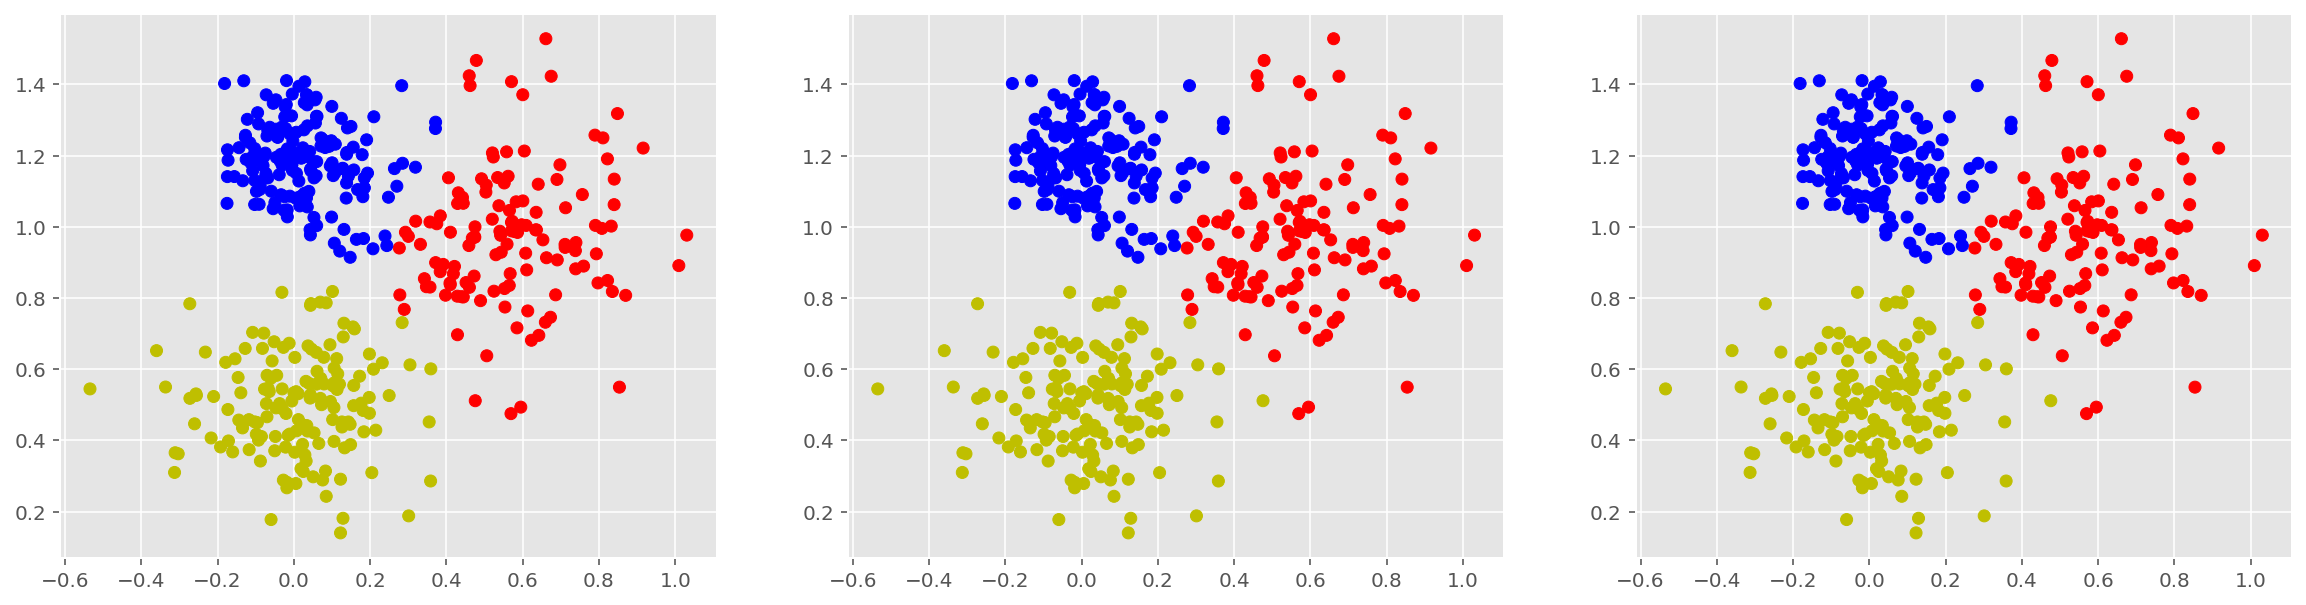

In [12]:
plt.figure(figsize=[20,5])
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(data[:,0], data[:,1], c=C[-(3-i)], cmap=cmap)

Of course, scikit-learn gives us a robust KMeans object.

It behaves just like a classifier, except that you only give it inputs (no class labels).

The scikit-learn KMeans clusterer will actually try several random starts, and pick the "best" result.

Unfortunately, it doesn't give us a way to visualize the steps it went through.

In [13]:
from sklearn.cluster import KMeans
km = KMeans(3)
km.fit(data)

KMeans(n_clusters=3)

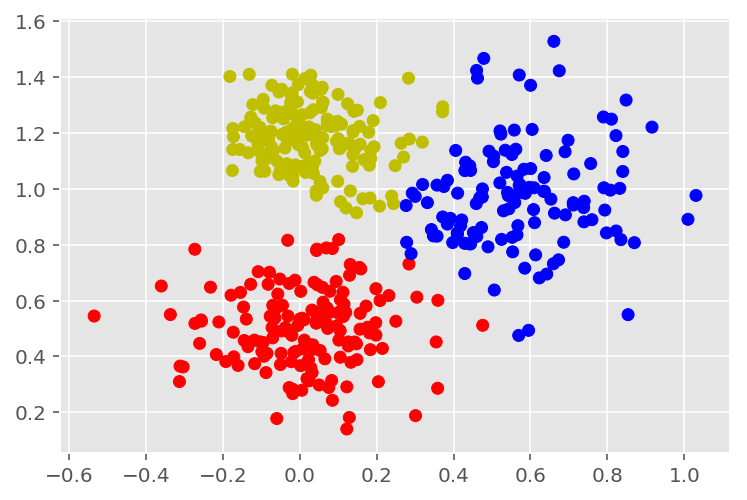

In [13]:
plt.scatter(data[:,0], data[:,1], c=km.predict(data), cmap=cmap)
plt.show()

## Guessing K
---
I know the data used above was generated from 3 Gaussian blobs, so we've been using K.

In general, though, how many clusters should there be?

How can we guess?

Let's try K=2:

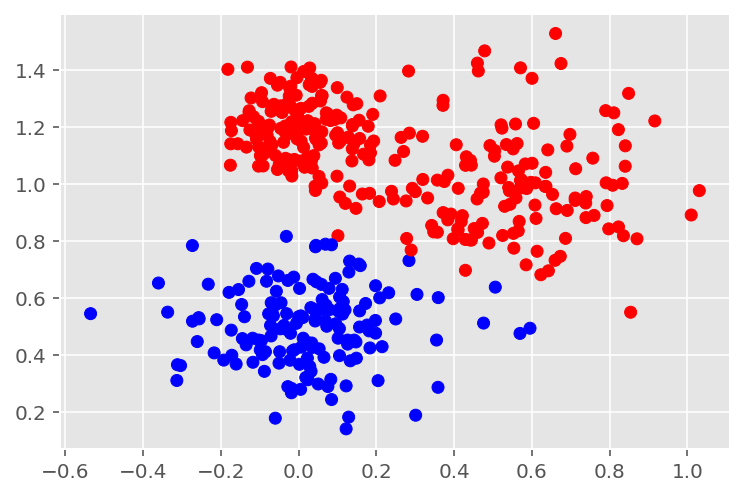

In [14]:
km2 = KMeans(2) # uses two clusters
km2.fit(data)
plt.scatter(data[:,0], data[:,1], c=km2.predict(data), cmap=cmap)
plt.show()

Or K=4:

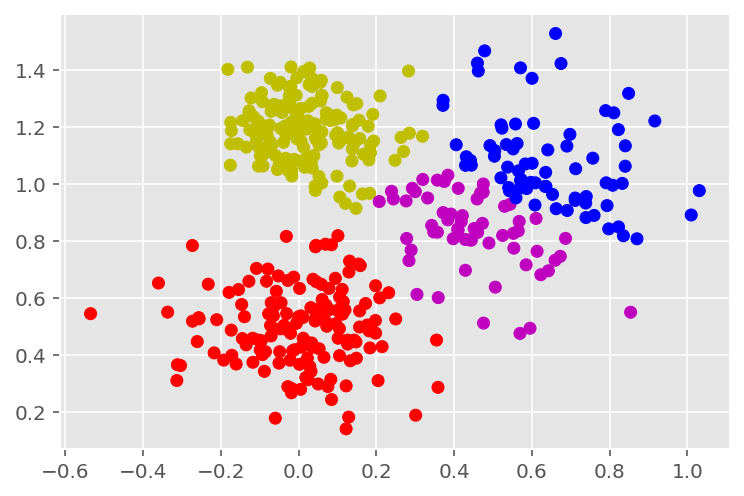

In [20]:
cmap = ListedColormap(['r','y','b','m'])
km4 = KMeans(4) # uses two clusters
km4.fit(data)
plt.scatter(data[:,0], data[:,1], c=km4.predict(data), cmap=cmap)
plt.show()

Or K=10:

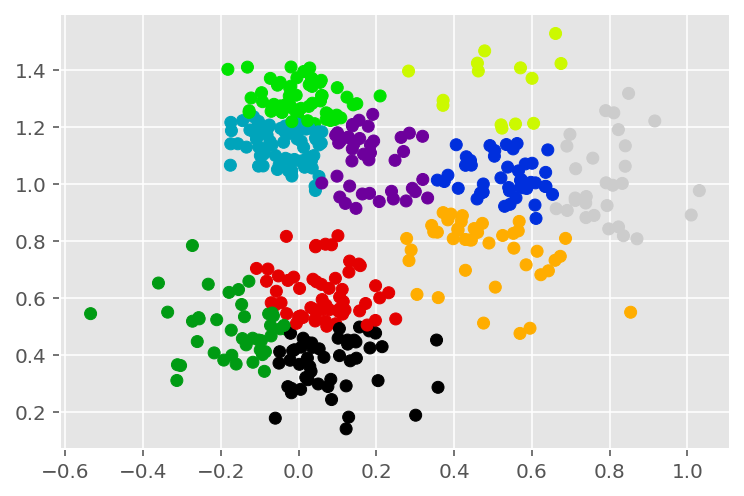

In [21]:
km10 = KMeans(10) # uses ten clusters
km10.fit(data)
plt.scatter(data[:,0], data[:,1], c=km10.predict(data), cmap='nipy_spectral')
plt.show()

## Hierarchical Clustering
---
One answer to the problem of "how many clusters":

Try all of them!

Hierarchical algorithms are either top down or bottom up.

The bottom up algorithms (agglomerative) are the most popular.

The result of hierarchical clustering is a *dendrogram* plot, showing how the clusters break down (or build up, if you prefer).

Let's first get a smaller dataset to illustrate.

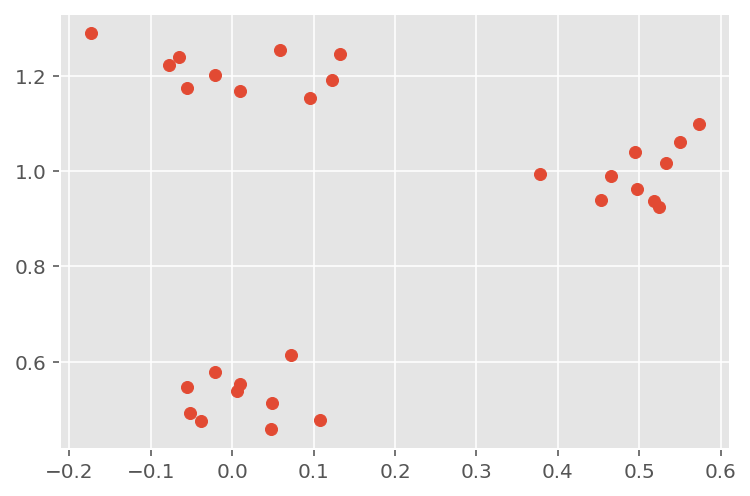

In [22]:
c1 = sample_cluster(10, 0, 0.5, 0.05)
c2 = sample_cluster(10, 0, 1.2, 0.1)
c3 = sample_cluster(10, 0.5, 1, 0.05)
data = np.concatenate((c1, c2, c3))
plt.scatter(data[:,0], data[:,1])
plt.show()

While scikit-learn has agglomerative clustering, it isn't capable of showing us a dendrogram.

We'll use SciPy instead for this example.

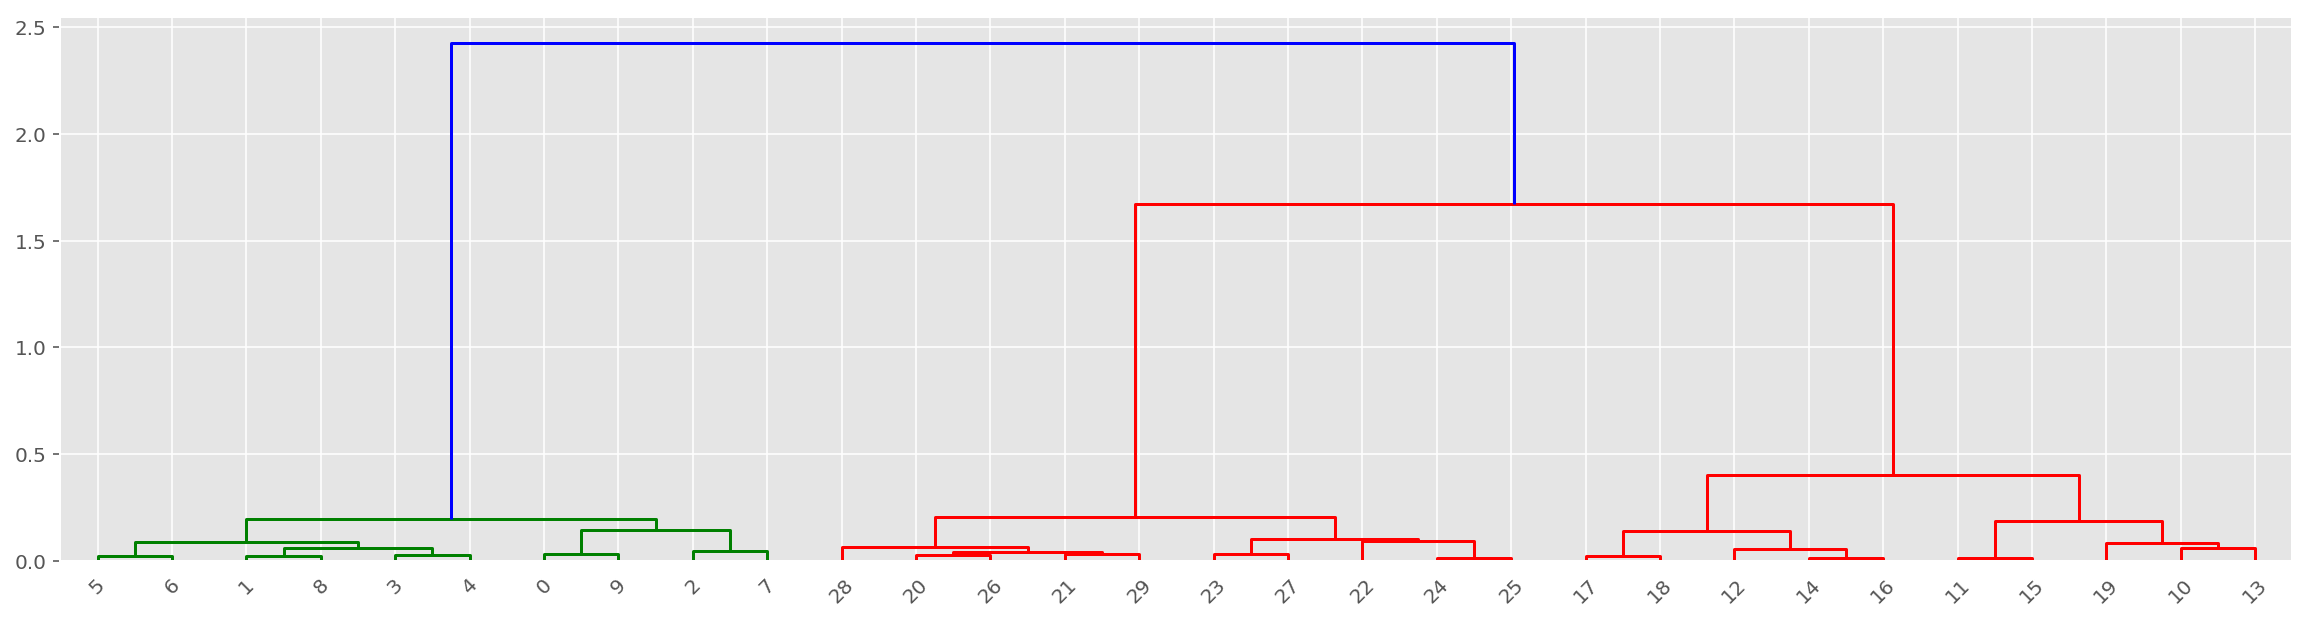

In [18]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(data)
plt.figure(figsize=[20,5])
dendrogram(linkage_array)
plt.show()